## IRIS-Dataset Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\Administrator\Desktop\Shubham\ML\Datasets\iris.csv")
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.shape

(150, 5)

In [4]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [6]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

## Visualizations

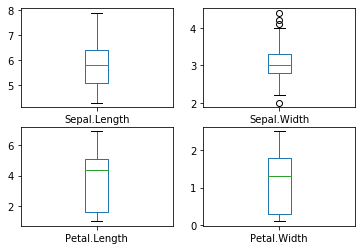

In [8]:
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

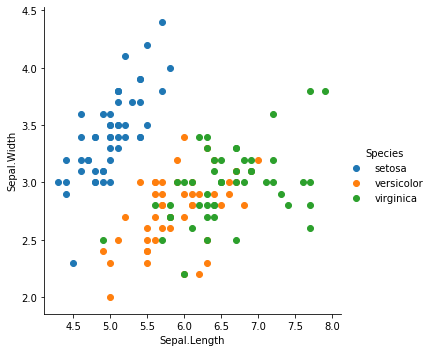

In [9]:
import seaborn as sns
sns.FacetGrid(data,hue='Species',height=5).map(plt.scatter,'Sepal.Length','Sepal.Width').add_legend()

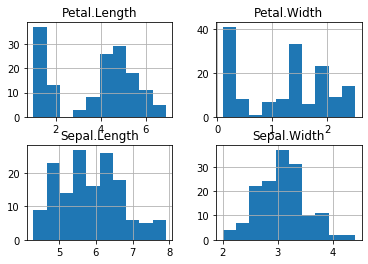

In [10]:
data.hist()
plt.show()

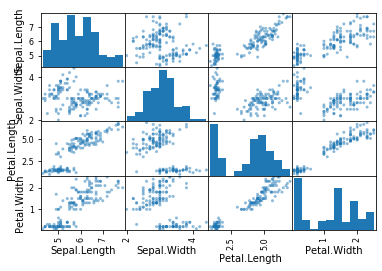

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## Classification

In [12]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:4]
y=data.iloc[:,4]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2018,test_size=0.3)


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print("Accuracy Score of Logistic Regression Model is :{:.2f}".format(accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      0.82      0.86        11
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45

[[18  0  0]
 [ 0  9  2]
 [ 0  1 15]]
Accuracy Score of Logistic Regression Model is :0.93


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV

parameters={'n_neighbors':np.arange(1,20,2)}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)
knn=KNeighborsClassifier()
cv=GridSearchCV(knn,param_grid=parameters,cv=kfold)
cv.fit(X,y)
result=pd.DataFrame(cv.cv_results_ )

In [15]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002539,0.000478,0.003516,0.001325,1,{'n_neighbors': 1},0.933333,0.966667,0.966667,0.966667,0.933333,0.953333,0.016330,10
1,0.006250,0.007655,0.003125,0.006250,3,{'n_neighbors': 3},0.933333,0.966667,0.966667,0.966667,0.966667,0.960000,0.013333,9
2,0.000000,0.000000,0.006250,0.007655,5,{'n_neighbors': 5},0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.000000,8
3,0.006250,0.007655,0.000000,0.000000,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,0.966667,0.973333,0.013333,3
4,0.000000,0.000000,0.009375,0.007655,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.966667,0.966667,0.973333,0.013333,3
5,0.006250,0.007655,0.000000,0.000000,11,{'n_neighbors': 11},0.966667,1.000000,1.000000,0.966667,1.000000,0.986667,0.016330,1
6,0.000000,0.000000,0.006250,0.007655,13,{'n_neighbors': 13},0.966667,1.000000,0.966667,0.966667,0.966667,0.973333,0.013333,3
7,0.000000,0.000000,0.003125,0.006250,15,{'n_neighbors': 15},0.966667,1.000000,0.933333,0.966667,1.000000,0.973333,0.024944,3
8,0.003125,0.006250,0.006250,0.007655,17,{'n_neighbors': 17},0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,2
9,0.000000,0.000000,0.003125,0.006250,19,{'n_neighbors': 19},0.966667,1.000000,0.933333,0.966667,1.000000,0.973333,0.024944,3


In [16]:
print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

{'n_neighbors': 11}
0.9866666666666667
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


## SVM

In [17]:
from sklearn.svm import SVC
svc=SVC(probability=True,gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_pred_prob=svc.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print("Accuracy Score of SVC Model is :{:.2f}".format(accuracy_score(y_test,y_pred)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.85      1.00      0.92        11
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 0 11  0]
 [ 0  2 14]]
Accuracy Score of SVC Model is :0.96


## Decision Tree Classification

In [18]:
from sklearn.tree import DecisionTreeClassifier
depth_range=[3,4,5,6,7,8,9,10]
minsplit_range=[5,10,15,20,25]
minleaf_range=[2,5,10,15,20]
parameters=dict(max_depth=depth_range,min_samples_split=minsplit_range,min_samples_leaf=minleaf_range)

dtc=DecisionTreeClassifier(random_state=2018)
cv1=GridSearchCV(dtc,param_grid=parameters,cv=5)
cv1.fit(X,y)
print(cv1.best_estimator_)
print(cv1.best_params_)
print('Accuracy Score for Decision tree Classifier:{:.2f}'.format(cv1.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2018, splitter='best')
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy Score for Decision tree Classifier:0.96


## Naive Bayes Algorithm

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

[[18  0  0]
 [ 0 11  0]
 [ 0  1 15]]
0.9777777777777777
